In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# データ数
N = 8

In [3]:
def T(k, N):
    if k == 0:
        return np.ones(N)/np.sqrt(N)
    else:
        return np.sqrt(2/N) * np.cos((np.pi/(2*N))*(2*np.arange(N)+1)*k)

In [4]:
T_1d = np.array([ T(i,N) for i in range(N) ])

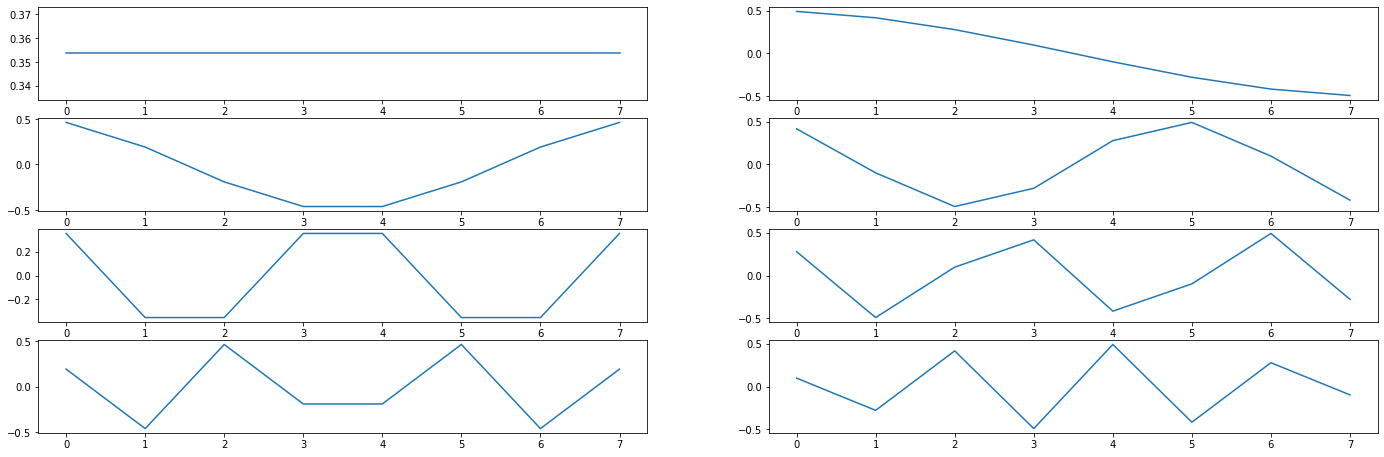

In [5]:
plt.figure(figsize=(24, 16))
plot_num = 7
for k in range(0, plot_num+1):
    plt.subplot(plot_num+1, 2, k + 1)
    plt.plot(T_1d[k])

In [6]:
T_2d = np.zeros((N,N,N,N))
for i in range(N):
    for j in range(N):
        T_i,T_j = np.meshgrid(T_1d[i], T_1d[j])
        T_2d[i, j] = T_i * T_j

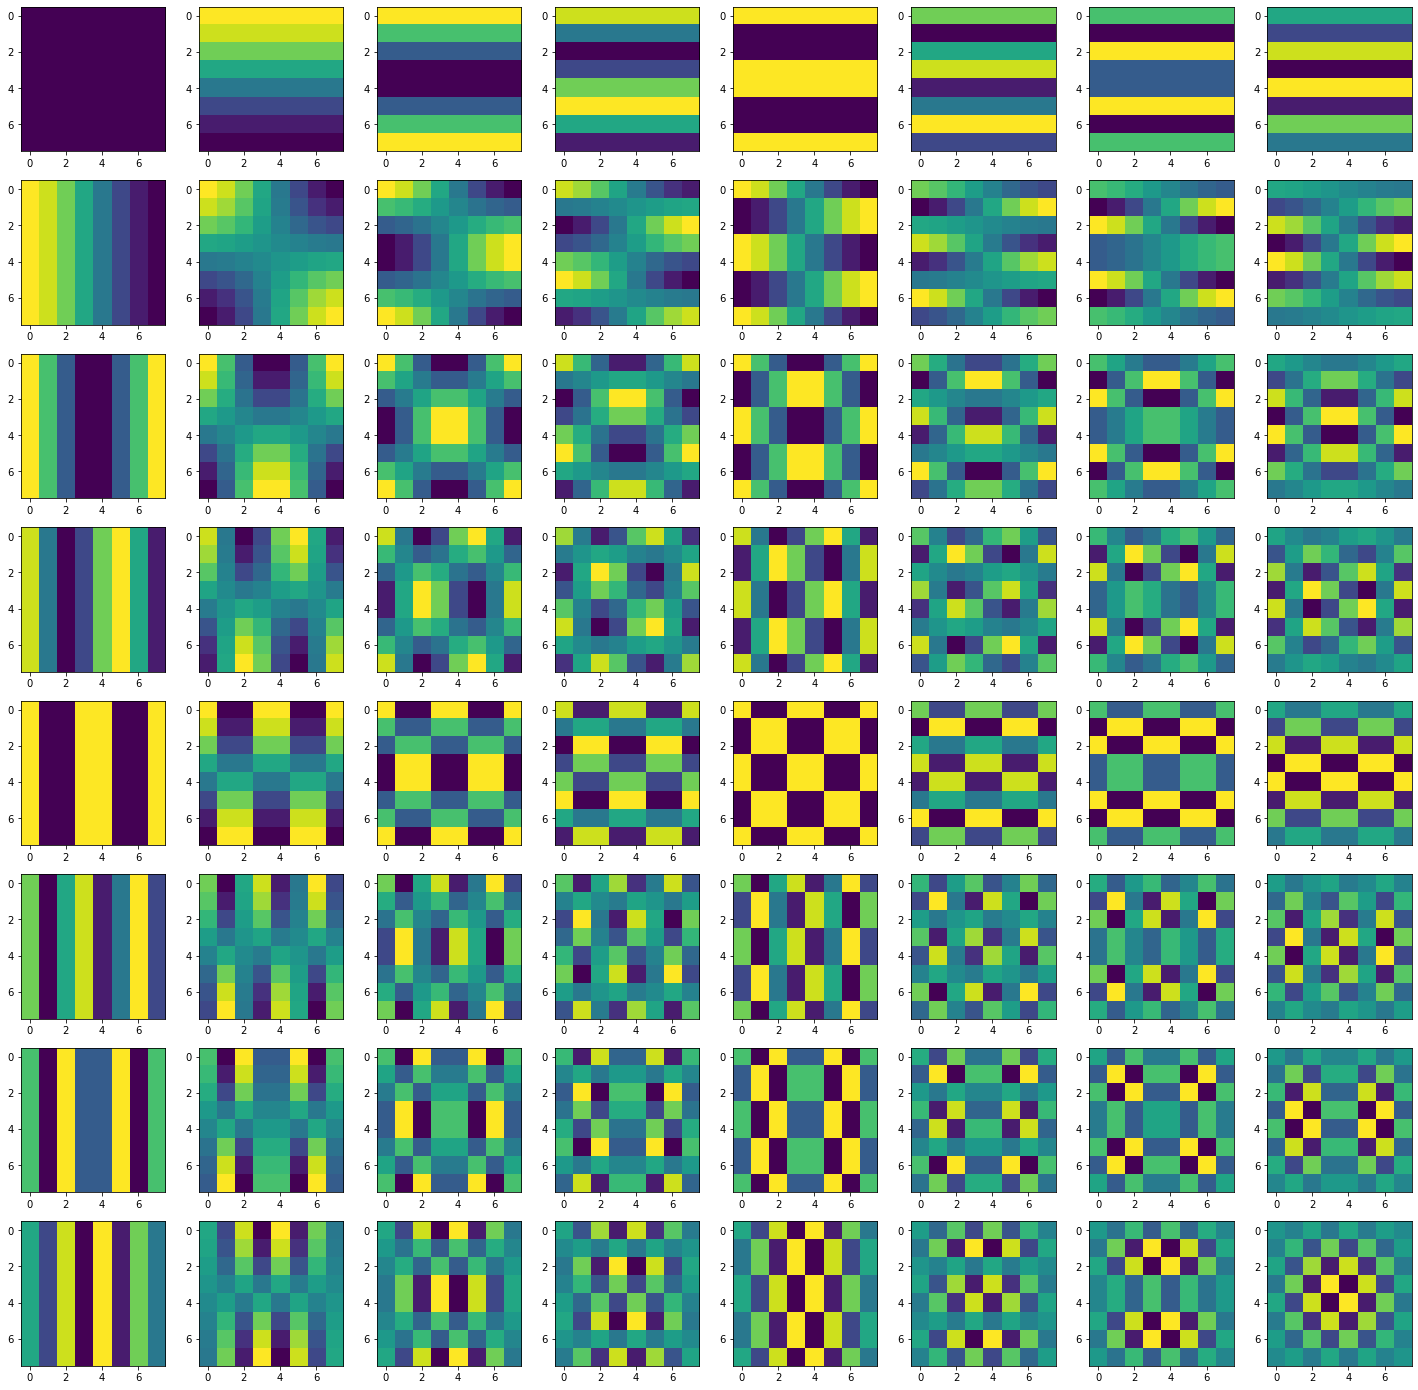

In [23]:
plt.figure(figsize=(25, 25))
for i in range(8):
    for j in range(8):
        plt.subplot(8,8,i*8+j+1)
        plt.imshow(T_2d[i,j])

plt.savefig('output/output_22.png',dpi=300)

In [9]:
def dct(data):
    return T_1d.dot(data)

In [10]:
def idct(c):
    return np.sum(T.T * c,axis = 1)

In [11]:
def dct2(data):
    return np.sum(T_2d.reshape(N*N,N*N)*data.reshape(N*N),axis=1).reshape(N,N)

In [12]:
def idct2(c):
    return np.sum((c.reshape(N,N,1)*T_2d.reshape(N,N,N*N)).reshape(N*N,N*N),axis=0).reshape(N,N)

In [13]:
class DCT:
    def __init__(self,N):
        self.N = N	# データ数．
        # 1次元，2次元離散コサイン変換の基底ベクトルをあらかじめ作っておく
        self.phi_1d = np.array([ self.phi(i) for i in range(self.N) ])

        # Nが大きいとメモリリークを起こすので注意
        # MNISTの28x28程度なら問題ない
        self.phi_2d = np.zeros((N,N,N,N))
        for i in range(N):
            for j in range(N):
                phi_i,phi_j = np.meshgrid(self.phi_1d[i],self.phi_1d[j])
                self.phi_2d[i,j] = phi_i*phi_j

    def dct(self,data):
        """ 1次元離散コサイン変換を行う """
        return self.phi_1d.dot(data)

    def idct(self,c):
        """ 1次元離散コサイン逆変換を行う """
        return np.sum( self.phi_1d.T * c ,axis=1)

    def dct2(self,data):
        """ 2次元離散コサイン変換を行う """
        return np.sum(self.phi_2d.reshape(N*N,N*N)*data.reshape(N*N),axis=1).reshape(N,N)

    def idct2(self,c):
        """ 2次元離散コサイン逆変換を行う """
        return np.sum((c.reshape(N,N,1)*self.phi_2d.reshape(N,N,N*N)).reshape(N*N,N*N),axis=0).reshape(N,N)

    def phi(self,k):
        """ 離散コサイン変換(DCT)の基底関数 """
        # DCT-II
        if k == 0:
            return np.ones(self.N)/np.sqrt(self.N)
        else:
            return np.sqrt(2.0/self.N)*np.cos((k*np.pi/(2*self.N))*(np.arange(self.N)*2+1))

In [14]:
N = 10
dct = DCT(10)

In [15]:
img = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,1,0,0,0,0,0,0,1,0],
    [0,1,0,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,1,1,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,0]
])

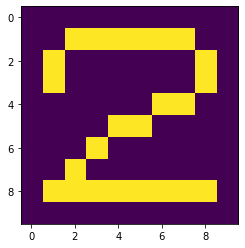

In [16]:
plt.imshow(img)
plt.savefig('output/output_22.png',dpi=300)

In [17]:
c = dct.dct2(img)

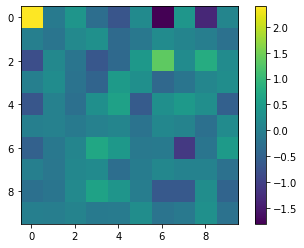

In [19]:
plt.imshow(c)
plt.colorbar()
plt.savefig('output/output_22.png',dpi=300)

In [18]:
y = dct.idct2(c)

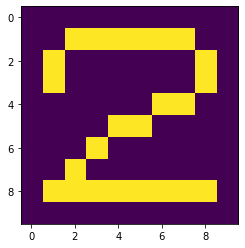

In [19]:
plt.imshow(y)

In [20]:
c.shape

(10, 10)

In [21]:
# 情報抜いてみる
cc = np.array(c)
cc[abs(cc) < 0.22]=0

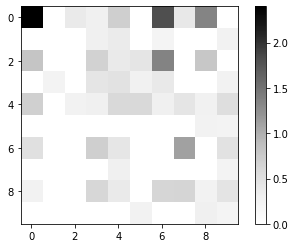

In [22]:
plt.imshow(abs(cc),cmap="Greys")
plt.colorbar()

In [23]:
y = dct.idct2(cc)

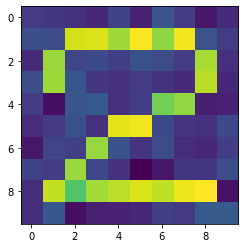

In [24]:
plt.imshow(y)

そこそこ見える
低周波だけ残してみる

In [25]:
zigzag = np.zeros(N*N).reshape(N, N)
i = 1
j = 0
step = 1
isScanning = True

def LeftDown(i,j):
    global step
    # 左下へ
    zigzag[j,i] = step
    step += 1
    
    while not (i == 0 or j == N-1):
        i -= 1
        j += 1
        zigzag[j,i] = step
        step += 1
        
    return i, j

def RightUP(i,j):
    global step
    # 右上へ
    zigzag[j,i] = step
    step += 1
    while not (j == 0 or i == N-1):
        i += 1
        j -= 1
        zigzag[j,i] = step
        step += 1
        
    return i, j

while isScanning:
    i, j = LeftDown(i,j)
    if j == N-1:
        i += 1  
    elif i == 0:
        j += 1
    
    if i == j == N-1:
        isScanning = False
    
    i, j = RightUP(i,j)
    if i == N-1:
        j += 1
    elif j == 0:
        i += 1
    
    if i == j == N-1:
        isScanning = False

In [26]:
zigzag

array([[ 0.,  1.,  5.,  6., 14., 15., 27., 28., 44., 45.],
       [ 2.,  4.,  7., 13., 16., 26., 29., 43., 46., 63.],
       [ 3.,  8., 12., 17., 25., 30., 42., 47., 62., 64.],
       [ 9., 11., 18., 24., 31., 41., 48., 61., 65., 78.],
       [10., 19., 23., 32., 40., 49., 60., 66., 77., 79.],
       [20., 22., 33., 39., 50., 59., 67., 76., 80., 89.],
       [21., 34., 38., 51., 58., 68., 75., 81., 88., 90.],
       [35., 37., 52., 57., 69., 74., 82., 87., 91., 96.],
       [36., 53., 56., 70., 73., 83., 86., 92., 95., 97.],
       [54., 55., 71., 72., 84., 85., 93., 94., 98., 99.]])

In [21]:
c_removed_high_freq = np.array(c)
THRESHOLD = 70
i = 1
j = 0
step = 1
isScanning = True

def LeftDown(i,j):
    global step, THRESHOLD
    # 左下へ
    if step > THRESHOLD:
        c_removed_high_freq[j,i] = 0
    step += 1
    
    while not (i == 0 or j == N-1):
        i -= 1
        j += 1
        if step > THRESHOLD:
            c_removed_high_freq[j,i] = 0
        step += 1
    
    return i, j

def RightUP(i,j):
    global step
    # 右上へ
    if step > THRESHOLD:
        c_removed_high_freq[j,i] = 0
    step += 1
    while not (j == 0 or i == N-1):
        i += 1
        j -= 1
        if step > THRESHOLD:
            c_removed_high_freq[j,i] = 0
        step += 1
        
    return i, j

while isScanning:
    i, j = LeftDown(i,j)
    if j == N-1:
        i += 1  
    elif i == 0:
        j += 1
    
    if i == j == N-1:
        isScanning = False
    
    i, j = RightUP(i,j)
    if i == N-1:
        j += 1
    elif j == 0:
        i += 1
    
    if i == j == N-1:
        isScanning = False

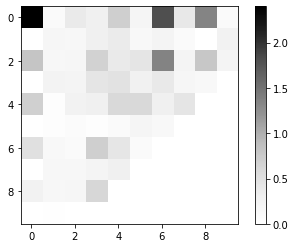

In [22]:
plt.imshow(abs(c_removed_high_freq),cmap="Greys")
plt.colorbar()
plt.savefig('output/output_22.png',dpi=300)

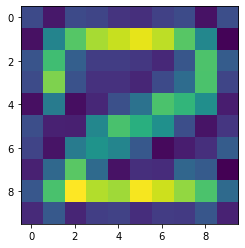

In [24]:
y = dct.idct2(c_removed_high_freq)
plt.imshow(y)
plt.savefig('output/output_22.png',dpi=300)